 #                  ** Projet Finale Algorithme et Complexité 
**Ce projet est realisé par Moustapha Ndiaye                          Eleve-Ingénieur & Data-scientiste en Ingénierie des données et Intelligence Artificielle**

### **Titre du Projet: Webscraping (Collecte Extraction Analyse et Traitement des donnés du site web  d'Alibaba (Entreprise Chinoise)**

# **Objectif du Projet: Obtention des données relatives aux produits à partir du sites Web d'Alibaba pour l'amélioration de la chaîne d'approvisionnement**
Les professionnels de l'approvisionnement et de vente de produits sont constamment à la recherche de moyens de réduire les coûts d'achat de biens et de services.Mais aussi recherchent en permanence des moyens d'obtenir les données nécessaires et précises avec le moins d'efforts possible. Dans ce contexte, la collecte de données précises sur des sites Web tels qu'Alibaba est une tâche gratifiante et parait difficile. Avec les progrès des applications et des outils de science des données, il est possible d'obtenir des données précises avec beaucoup de facilité par rapport aux efforts requis dans le passé. Le Webscraping ou Grattage des donnés l'aide de diverses bibliothèques Python est une compétence importante à avoir dans ce contexte.

# **Résultats Attendues:**
Apres les différentes phases de collectes,d'extraction,d'analyse et de traitement des donnés sur le site web nous obtiendrons enfin dans seul fichiés au format csv les résultats detaillées sur les types d'articles leurs prix leus évaluation ainsi que leur Urls existants dans la plate-forme du site de vente d'Alibaba 

## Webscraping:
Le webscraping  est le processus de collecte de données Web structurées de manière automatisée. On l'appelle aussi extraction de données Web. Certains des principaux cas d'utilisation du webscraping incluent la surveillance des prix, la veille sur les prix, la surveillance des actualités, la génération de prospects et les études de marché, entre autres. En général, l'extraction de données Web est utilisée par les personnes et les entreprises qui souhaitent utiliser la grande quantité de données Web accessibles au public pour prendre des décisions plus judicieuses.Dans ce contexte nous elaborerons un processus d'extraction et d'analyse des données de sites Web d'Alibaba de manière automatisée à l'aide d'un programme informatique. C'est une technique utile pour créer des ensembles de données pour la recherche et l'apprentissage.Enfin nous suiverons un enssembles étapes pour créer notre projet de  Webscraping à l'aide de Python et de son écosystème de bibliothèques

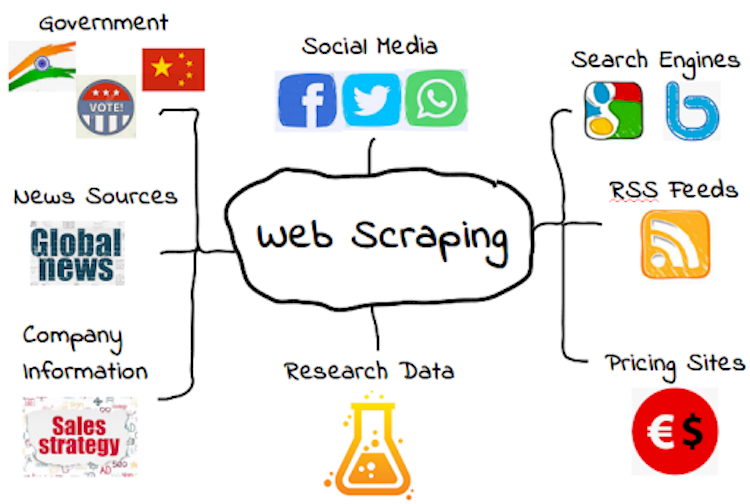

# ** Plan du Projet **
**1- Choix d'un site Web et déscription de notre projet**
Parcourir le site officiel d'Alibaba.
Identifiez les informations que nous souhaiterons retirer du site. 
Cré un fichier de format CSV apres extraction des  donnés.
Résumez enfin notre idée de projet et décrir notre code avec des explications detaillés dans un cahier Juptyer.


---


**2- Utilisez la bibliothèque de requêtes pour télécharger des pages Web**
Inspectez la source HTML du site Web et identifiez les bonnes URL à télécharger.
Téléchargez et enregistrez des pages Web localement à l'aide de la requestsbibliothèque.
Créez une fonction pour automatiser le téléchargement pour différents sujets/requêtes de recherche.

---


**3-Utilisez Beautiful Soup pour analyser et extraire des informations**
Analysez et explorez la structure des pages Web du site téléchargées à l'aide de Beautiful soup.
Utilisez les bonnes propriétés et méthodes pour extraire les informations requises.
Créez des fonctions à extraire de la page dans des listes et des dictionnaires.
Utilisez une API REST pour acquérir des informations supplémentaires si nécessaire.

---


**4-Cré un fichier CSV avec les informations extraites sur les Articles**
Créez des fonctions pour le processus de bout en bout de téléchargement, d'analyse et d'enregistrement de fichiers CSV.
Exécutez la fonction avec différentes entrées pour créer un ensemble de données de fichiers CSV.
Vérifiez les informations contenues dans les fichiers CSV en les relisant à l'aide de Pandas .


Installons d'abord les fonctions utiles de jovian

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 3.0 MB/s 


In [2]:
import jovian

In [3]:
jovian.commit(project="Project_Python_Web_scraping_MSDA")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


Voici les étapes que nous suivrons :
Pour ce faire nous utiluserons ce lien  https://www.alibaba.com/trade/search?fsb=y&IndexArea=product_en&CatId=&SearchText=Inflight+Items&viewtype=G&tab={page}
pour faire une etude d'analyse et d'extraction sur la  liste des produits ; spécifiquement des couvertures. Pour chaque article, nous tirerons les détails de base de l'article, le prix de l'article, le prix de l'offre le cas échéant, son évaluation le cas échéant,et les differentes URL de la page de chaque article.
Pour chaque article, nous obtiendrons plus de détails sur le produit à partir de la page de l'article. Nous allons créer un fichier avec les détails de l'article. Pour chaque article, nous créerons également un fichier CSV au format indicatif suivant :
Titre, ArticlePrix, Étoiles, Site Web
![](https://i.imgur.com/h3dCi07.png)

### Listons le nombre d'articles au sein du site d'Alibaba
Nous utiliserons la bibliothèque de requests en Python pour télécharger la page ensuite
utiliser beautifoul soup pour analyser et extraire des informations
convertir en une dataframme de données Pandas
Nous exécuterons les étapes ci-dessus comme indiqué 

In [4]:
# Installer les librairies 
!pip install requests --upgrade --quiet
!pip install beautifulsoup4 --upgrade --quiet
!pip install pandas --quiet
# Importer les libraries
import requests
from random import randint
from time import sleep
from bs4 import BeautifulSoup
import pandas as pd

     |████████████████████████████████| 62 kB 836 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 97 kB 3.1 MB/s 


Ici, nous obtenons le contenu de la page au format html à l'aide de requêtes, puis nous l'analyserons à l'aide de Beautifulsoup. Dans notre recherche spécifique, nous avons des attributs dont la valeur est aucune. Donc, tout d'abord, nous organisons / analysons les données par rapport à la balise de liste d'articles. En cherchant sur le site Web à l'aide de l'option Inspecter (clic droit sur les éléments), nous avons constaté que l'élément est organisé dans la balise div avec class=organic-gallery-offer-outter J-offer-wrapper. Nous utilisons une boucle for et une méthode d'ajout pour organiser les données en item_list_tags. Nous utilisons également une combinaison de sommeil et de randint sur le site Web. (La fonction randint () choisira un entier aléatoire entre les limites supérieure et inférieure données, dans ce cas, 10 et 2 respectivement, pour chaque itération de la boucle . L'utilisation de la fonction randint () en combinaison avec la fonction sleep () aidera à ajouter des pauses courtes et aléatoires dans la vitesse d'exploration du programme. La fonction sleep () cessera essentiellement l'exécution du programme pendant le nombre de secondes donné. . Ici, le nombre de secondes sera introduit de manière aléatoire dans la fonction sleep en utilisant la fonction randint(). 

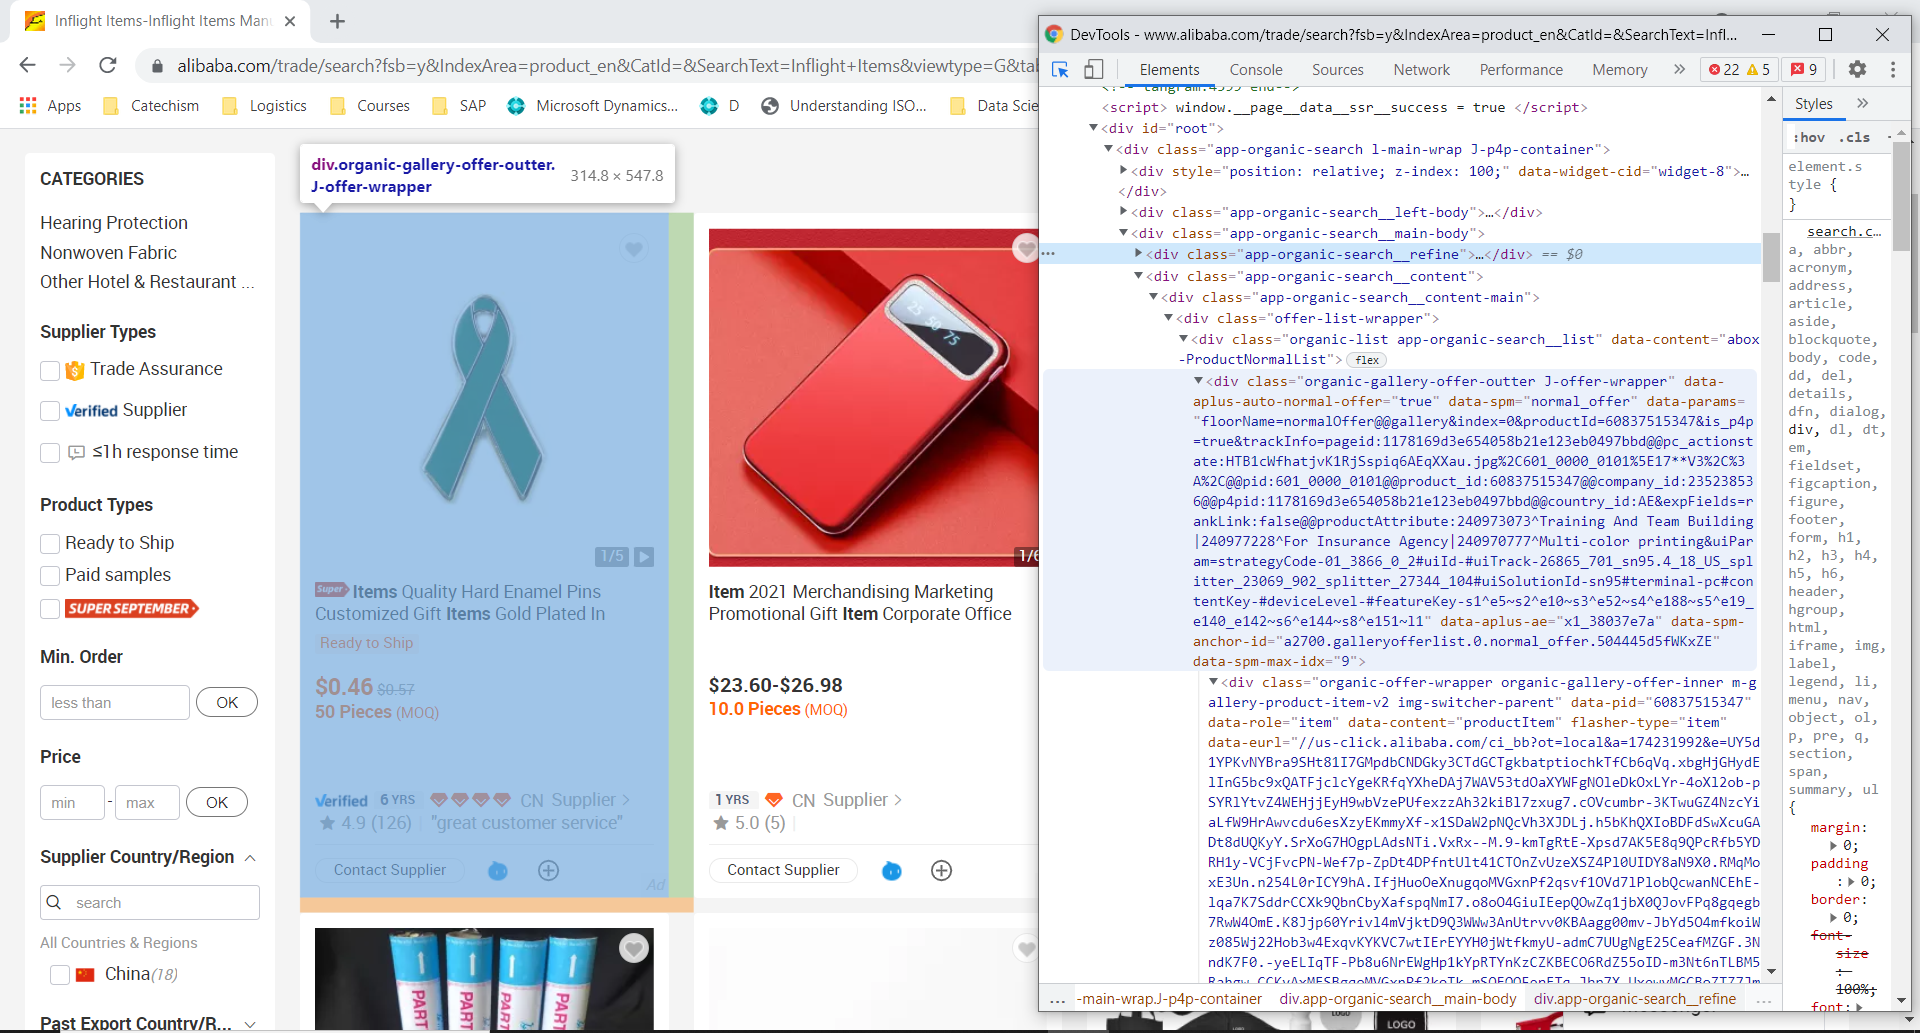

On peut accéder au contenu de la page web en utilisant la propriété .text de response.

In [5]:
topic_url = 'https://www.alibaba.com/trade/search?fsb=y&IndexArea=product_en&CatId=&SearchText=Inflight+Items&viewtype=G&tab={page}'

In [6]:
response = requests.get(topic_url)

In [7]:
page_contents = response.text

In [8]:
len(page_contents)

433473

On peut accéder au contenu de la page web en utilisant la propriété .text de response.

In [9]:
page_contents[:1000]

'    <!-- tangram:4926 begin-->\n\n\n<!DOCTYPE html>\n<html class="rwd" >\n<head>\n    <script>\n                window.__setBBParams = function(keyName, timeVal){\n            if( typeof(Performance) != \'undefined\' ){\n                window.__BB = window.__BB || { mode: -1 };\n                window.__BB[\'extendParams\'] = window.__BB[\'extendParams\'] || {};\n                timeVal = timeVal || new Date().getTime() - performance.timing.navigationStart;\n                window.__BB[\'extendParams\'][keyName]= timeVal;\n            }\n        };\n        window.__setBBParams(\'time1\');\n        // 暂时去掉 umid 加载\n        // window._APLUS_UMID_CLOSE_ = true;\n    </script>\n                <link rel="preload" href="//s.alicdn.com/@sc04/kf/HTB1j9l9QFXXXXXZaXXXq6xXFXXXM.jpg_300x300.jpg" as="image">\n        <script>\n            window.__BB_heroImgUrl = "//s.alicdn.com/@sc04/kf/HTB1j9l9QFXXXXXZaXXXq6xXFXXXM.jpg_300x300.jpg"\n        </script>\n        <meta name="aplus-auto-exp-durati

In [10]:
item_list_tags = []
for page in range(1,5):
      items_url = f"https://www.alibaba.com/trade/search?fsb=y&IndexArea=product_en&CatId=&SearchText=Inflight+Items&viewtype=G&tab={page}"
      response = requests.get(items_url)
      page_contents = response.text
      if response.status_code != 200:
          raise Exception('Failed to load page {}'.format(items_url))
      doc = BeautifulSoup(page_contents, "html.parser")
      for item in doc.find_all("div", {'class': "organic-gallery-offer-outter J-offer-wrapper"}):
            item_list_tags.append(item)
      sleep(randint(2,10))

* Si nous n'utilisons pas de boucle pour récupérer plus de pages du site Web, cela donne
seulement 8 résultats. Dans ce cas; il y a deux options: nous pouvons simplement gratter plus de pages, avec 8 résultats (dans ce cas) dans chacun avec Requests-Beautifulsoup OU utiliser Selenium. Mais nous irons avec le premier choix car c'est plus facile.

In [11]:
len(item_list_tags)

32

Comme vous pouvez le voir notre page contient 32 articles
Maintenant nous allons cré une fonction pour télécharger les pages et récupéré le nombre d'article contenu dans chaque page

In [12]:
def get_item_list_tags():
    item_list_tags = []
    for page in range(1,5):
          items_url = f"https://www.alibaba.com/trade/search?fsb=y&IndexArea=product_en&CatId=&SearchText=Inflight+Items&viewtype=G&tab={page}"
          response = requests.get(items_url)
          page_contents = response.text
          if response.status_code != 200:
              raise Exception('Failed to load page {}'.format(items_url))
          doc = BeautifulSoup(page_contents, "html.parser")
          for item in doc.find_all("div", {'class': "organic-gallery-offer-outter J-offer-wrapper"}):
                item_list_tags.append(item)
          sleep(randint(2,10))
          print('Downloading page number', page)  
    return item_list_tags
item_list_tags= get_item_list_tags()
len (item_list_tags)

32

Nous allons ensuite cré une fonction d'assistance indépendante qui effectuera la tâche ci-dessus de téléchargement des pages, de vérification de la réponse et d'analyse à l'aide de beautifulsoup

In [13]:
def get_item_page(items_url):
    response = requests.get(items_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(items_url))
    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

In [14]:
doc = get_item_page('https://www.alibaba.com/trade/search?fsb=y&IndexArea=product_en&CatId=&SearchText=Inflight+Items&viewtype=G&tab=')


### Obtenir les détails et la description du titre des Articles

Après l'étape précédente d'extraction de tous les détails de l'élément, nous extrayons tous les titres requis dans un format de dictionnaire, de sorte que la valeur nulle soit également capturée. (Nous pouvons également utiliser un bloc try except qui est une instruction pour faire quelque chose sauf pour aucun cas ; mais nous le ferons sur une autre instance de ce même projet) Veuillez noter que all_item_titledetail_list peut être trouvé à partir de la balise p avec class='elements -title-normal__content medium' lors de l'inspection du site Web comme à l'étape précédente.

In [15]:
all_item_titledetail_list = []
for item in item_list_tags:
    title = item.find ('p', {'class': 'elements-title-normal__content medium'})
    all_item_titledetail_list.append({"Title":title.text.strip()})

From experience, we know that a combination of dictionaries may be difficult to handle while making dataframes. So we convert the above list of dictionaries into simple list 

In [16]:
itemdetail=[]
for tag in all_item_titledetail_list:
    itemdetail.append(tag.get('Title'))
itemdetail[:8]

['Item Nicro Glow Theme Party Supplies Hats Neon Glasses Birthday Glow Party In The Dark Party Decoration Item',
 'Item Promotional Gifts Gift Item Mini Supermarket Trolley Cart Small Shopping Basket For Sales Promotion In Candy Sweet Cake Makeup Cosmetic',
 'Item CHRISTMAS Theme Decor Birthday Kit De Fiesta Articulos Parties Party Wholesale Party Item',
 'Festival Event Party Supplies Chainsaw Monster Weapon Zombie Killer Bloody Stone Foam Horror Halloween Christmas Print Item Die',
 'Daqido Hotel Motel Keychain Gift Style pendant Keychain for her him promotional item',
 'Fashionable inflight items plastic sound insulation ear plugs',
 'promotional items',
 'Cheap Custom Promotional Item,Promotional Product,Promotional Item China']

Creons une fonction d'assistance qui permet de récupéré le tittre des articles 

In [17]:
def get_itemdetail(item_list_tags):
    all_item_titledetail_list = []
    for item in item_list_tags:
        title = item.find ('p', {'class': 'elements-title-normal__content medium'})
        all_item_titledetail_list.append({"Title":title.text.strip()})

    itemdetail=[]
    for tag in all_item_titledetail_list:
        itemdetail.append(tag.get('Title'))
    return itemdetail

itemdetail = get_itemdetail(item_list_tags)
len (itemdetail)
itemdetail 

['Item Nicro Glow Theme Party Supplies Hats Neon Glasses Birthday Glow Party In The Dark Party Decoration Item',
 'Item Promotional Gifts Gift Item Mini Supermarket Trolley Cart Small Shopping Basket For Sales Promotion In Candy Sweet Cake Makeup Cosmetic',
 'Item CHRISTMAS Theme Decor Birthday Kit De Fiesta Articulos Parties Party Wholesale Party Item',
 'Festival Event Party Supplies Chainsaw Monster Weapon Zombie Killer Bloody Stone Foam Horror Halloween Christmas Print Item Die',
 'Daqido Hotel Motel Keychain Gift Style pendant Keychain for her him promotional item',
 'Fashionable inflight items plastic sound insulation ear plugs',
 'promotional items',
 'Cheap Custom Promotional Item,Promotional Product,Promotional Item China',
 'Item Nicro Glow Theme Party Supplies Hats Neon Glasses Birthday Glow Party In The Dark Party Decoration Item',
 'Item Promotional Gifts Gift Item Mini Supermarket Trolley Cart Small Shopping Basket For Sales Promotion In Candy Sweet Cake Makeup Cosmetic',

### Extraction du prix des l'article, des évaluations de chaque articles et des URL

In [18]:
item_price_tags = []
for item in item_list_tags:
    item_price = item.find ('span', {'class': 'elements-offer-price-normal__price'})
    if item_price == None:
        item_price_tags.append({"ItemPrice":item_price})
    else:
        item_price_tags.append({"ItemPrice":item_price.get_text(strip=True)})

In [19]:
len(item_price_tags)

32

Definissions de la fonction pour récupéré le prix de trois articles dans notre page web

In [20]:
itemprice=[]
for tag in item_price_tags:
    itemprice.append(tag.get('ItemPrice'))
itemprice[:3]

['$7.20-$8.00', '$1.40-$1.50', '$6.00-$20.00']

In [21]:
#nous allons résumer les étapes ci-dessus pour obtenir le prix dans une fonction
def get_itemprice(item_list_tags):
    item_price_tags = []
    for item in item_list_tags:
        item_price = item.find ('span', {'class': 'elements-offer-price-normal__price'})
        if item_price == None:
            item_price_tags.append({"ItemPrice":item_price})
        else:
            item_price_tags.append({"ItemPrice":item_price.get_text(strip=True)})

    itemprice=[]
    for tag in item_price_tags:
        itemprice.append(tag.get('ItemPrice'))
    return itemprice

itemprice = get_itemprice(item_list_tags)
len(itemprice)

32

Le premier prix apparaît Aucun car il s'agit d'un article avec un prix d'offre et nous devons donc afficher le prix d'offre. (Pour le deuxième article, le prix d'offre affichera une valeur Aucun puisque le prix normal est valide)

### Extraction des évaluations d'articles

Nous extrairons les évaluations des articles comme indiqué ci-dessous avec cette fonction:

In [22]:
star_tags = []
for item in item_list_tags:
    star = len(item.find_all('i', {'class': "iconfont iconzuanshi seller-star-level__dm dm-orange"}))
    star_tags.append({"Stars":star})

In [23]:
len(star_tags )

32

In [24]:
star=[]
for tag in star_tags:
    star.append(tag.get('Stars'))

In [25]:
star[:5]

[4, 1, 3, 1, 1]

In [26]:
star_tags[:6]

[{'Stars': 4},
 {'Stars': 1},
 {'Stars': 3},
 {'Stars': 1},
 {'Stars': 1},
 {'Stars': 0}]

In [27]:
#nous allons créer une petite fonction pour faire les étapes ci-dessus
def get_Stars(item_list_tags):
    star_tags = []
    for item in item_list_tags:
        star = len(item.find_all('i', {'class': "iconfont iconzuanshi seller-star-level__dm dm-orange"}))
        star_tags.append({"Stars":star})
    star=[]
    for tag in star_tags:
        star.append(tag.get('Stars'))
    return star
star = get_Stars(item_list_tags)
star

[4,
 1,
 3,
 1,
 1,
 0,
 0,
 3,
 4,
 1,
 3,
 1,
 1,
 0,
 0,
 3,
 1,
 3,
 1,
 2,
 1,
 0,
 0,
 3,
 1,
 3,
 1,
 1,
 3,
 0,
 0,
 3]

### Extraction des pages URL des Articles

Nous allons extraire les pages URL avec les fonction comme indiqué ci-dessous

In [28]:
website_tags = []
base_url = 'https:'
for item in item_list_tags:
    website = item.find ('a', {'class': 'organic-gallery-offer__img-section'})
    website_tags.append({"Website":base_url+website['href']})

In [29]:
len(website_tags)

32

In [30]:
URLS=[]
for tag in website_tags:
    URLS.append(tag.get('Website'))

In [31]:
#nous résumerons les étapes ci-dessus pour obtenir des URL a l'aide de la fonction ci dessous 
def get_URLS(item_list_tags):
    website_tags = []
    base_url = 'https:'
    for item in item_list_tags:
        website = item.find ('a', {'class': 'organic-gallery-offer__img-section'})
        website_tags.append({"Website":base_url+website['href']})
    URLS=[]
    for tag in website_tags:
        URLS.append(tag.get('Website'))
    return URLS
URLS = get_URLS(item_list_tags)

In [32]:
URLS[:9]

['https://www.alibaba.com/product-detail/Item-Nicro-Glow-Theme-Party-Supplies_1700007340258.html?s=p',
 'https://www.alibaba.com/product-detail/Item-Promotional-Gifts-Gift-Item-Mini_60610276980.html?s=p',
 'https://www.alibaba.com/product-detail/Item-CHRISTMAS-Theme-Decor-Birthday-Kit_1600334607321.html?s=p',
 'https://www.alibaba.com/product-detail/Festival-Event-Party-Supplies-Chainsaw-Monster_1600332012916.html?s=p',
 'https://www.alibaba.com/product-detail/Daqido-Hotel-Motel-Keychain-Gift-Style_1600329298987.html?s=p',
 'https://www.alibaba.com/product-detail/Fashionable-inflight-items-plastic-sound-insulation_60383877450.html',
 'https://www.alibaba.com/product-detail/promotional-items_60602317457.html',
 'https://www.alibaba.com/product-detail/Cheap-Custom-Promotional-Item-Promotional-Product_905019274.html',
 'https://www.alibaba.com/product-detail/Item-Nicro-Glow-Theme-Party-Supplies_1700007340258.html?s=p']

## Compilations des informations extraites dans un dictionnaire
Maintenant, nous allons cré un dictionnaire avec tous les détails des articles extraites 

In [33]:
Dict={"Title":itemdetail,"ItemPrice":itemprice,"Stars":star,"Website":URLS}

We can organise the data in a dataframe as shown below using pandas

In [34]:
items_df = pd.DataFrame(Dict)

In [35]:
items_df

,Title,ItemPrice,Stars,Website
0,Item Nicro Glow Theme Party Supplies Hats Neon...,$7.20-$8.00,4,https://www.alibaba.com/product-detail/Item-Ni...
1,Item Promotional Gifts Gift Item Mini Supermar...,$1.40-$1.50,1,https://www.alibaba.com/product-detail/Item-Pr...
2,Item CHRISTMAS Theme Decor Birthday Kit De Fie...,$6.00-$20.00,3,https://www.alibaba.com/product-detail/Item-CH...
3,Festival Event Party Supplies Chainsaw Monster...,"$1,000.00-$25,000.00",1,https://www.alibaba.com/product-detail/Festiva...
4,Daqido Hotel Motel Keychain Gift Style pendant...,$0.46-$1.58,1,https://www.alibaba.com/product-detail/Daqido-...
5,Fashionable inflight items plastic sound insul...,$0.038-$0.25,0,https://www.alibaba.com/product-detail/Fashion...
6,promotional items,$0.10-$1.00,0,https://www.alibaba.com/product-detail/promoti...
7,"Cheap Custom Promotional Item,Promotional Prod...",$0.10-$0.50,3,https://www.alibaba.com/product-detail/Cheap-C...
8,Item Nicro Glow Theme Party Supplies Hats Neon...,$7.20-$8.00,4,https://www.alibaba.com/product-detail/Item-Ni...
9,Item Promotional Gifts Gift Item Mini Supermar...,$1.40-$1.50,1,https://www.alibaba.com/product-detail/Item-Pr...


Nous pouvons maintenant crés le fichier csv requis à partir du cadre de données créé comme indiqué ci-dessous

In [41]:
items_df.to_csv('Fichier.csv', index=None)

Nous avons maintenant resumé en tout une fonction de webscraping complet ci-dessous

In [37]:
def get_item_list_tags():
    item_list_tags = []
    for page in range(1,5):
          items_url = f"https://www.alibaba.com/trade/search?fsb=y&IndexArea=product_en&CatId=&SearchText=Inflight+Items&viewtype=G&tab={page}"
          response = requests.get(items_url)
          page_contents = response.text
          if response.status_code != 200:
              raise Exception('Failed to load page {}'.format(items_url))
          doc = BeautifulSoup(page_contents, "html.parser")
          for item in doc.find_all("div", {'class': "organic-gallery-offer-outter J-offer-wrapper"}):
                item_list_tags.append(item)
          sleep(randint(2,10))
          print('Downloading page number', page)
    return item_list_tags
item_list_tags= get_item_list_tags()

def get_itemdetail(item_list_tags):
    all_item_titledetail_list = []
    for item in item_list_tags:
        title = item.find ('p', {'class': 'elements-title-normal__content medium'})
        all_item_titledetail_list.append({"Title":title.text.strip()})

    itemdetail=[]
    for tag in all_item_titledetail_list:
        itemdetail.append(tag.get('Title'))
    return itemdetail
itemdetail = get_itemdetail(item_list_tags)

def get_itemprice(item_list_tags):
    item_price_tags = []
    for item in item_list_tags:
        item_price = item.find ('span', {'class': 'elements-offer-price-normal__price'})
        if item_price == None:
            item_price_tags.append({"ItemPrice":item_price})
        else:
            item_price_tags.append({"ItemPrice":item_price.get_text(strip=True)})

    itemprice=[]
    for tag in item_price_tags:
        itemprice.append(tag.get('ItemPrice'))
    return itemprice
itemprice = get_itemprice(item_list_tags)

def get_Stars(item_list_tags):
    star_tags = []
    for item in item_list_tags:
        star = len(item.find_all('i', {'class': "iconfont iconzuanshi seller-star-level__dm dm-orange"}))
        star_tags.append({"Stars":star})
    star=[]
    for tag in star_tags:
        star.append(tag.get('Stars'))
    return star
star = get_Stars(item_list_tags)

def get_URLS(item_list_tags):
    website_tags = []
    base_url = 'https:'
    for item in item_list_tags:
        website = item.find ('a', {'class': 'organic-gallery-offer__img-section'})
        website_tags.append({"Website":base_url+website['href']})
    URLS=[]
    for tag in website_tags:
        URLS.append(tag.get('Website'))
    return URLS
URLS = get_URLS(item_list_tags)

In [38]:
def get_web_scraping():
    get_item_list_tags()

    Dict1 = {
        'title': get_itemdetail(item_list_tags),
        'itemprice': get_itemprice(item_list_tags),
        'starrs': get_Stars(item_list_tags),
        'url': get_URLS(item_list_tags)
    }
    return pd.DataFrame(Dict1)

function_based_df = get_web_scraping()
function_based_df[:5]

,title,itemprice,starrs,url
0,Item Nicro Glow Theme Party Supplies Hats Neon...,$7.20-$8.00,4,https://www.alibaba.com/product-detail/Item-Ni...
1,Item Promotional Gifts Gift Item Mini Supermar...,$1.40-$1.50,1,https://www.alibaba.com/product-detail/Item-Pr...
2,Item CHRISTMAS Theme Decor Birthday Kit De Fie...,$6.00-$20.00,3,https://www.alibaba.com/product-detail/Item-CH...
3,Festival Event Party Supplies Chainsaw Monster...,"$1,000.00-$25,000.00",1,https://www.alibaba.com/product-detail/Festiva...
4,Items 2021 Best Selling Products In Usa Father...,$0.60-$1.00,2,https://www.alibaba.com/product-detail/Items-2...


In [39]:
item_page_url = URLS[0]

In [40]:
URLS[0:9]

['https://www.alibaba.com/product-detail/Item-Nicro-Glow-Theme-Party-Supplies_1700007340258.html?s=p',
 'https://www.alibaba.com/product-detail/Item-Promotional-Gifts-Gift-Item-Mini_60610276980.html?s=p',
 'https://www.alibaba.com/product-detail/Item-CHRISTMAS-Theme-Decor-Birthday-Kit_1600334607321.html?s=p',
 'https://www.alibaba.com/product-detail/Festival-Event-Party-Supplies-Chainsaw-Monster_1600332012916.html?s=p',
 'https://www.alibaba.com/product-detail/Items-2021-Best-Selling-Products-In_1600254759290.html?s=p',
 'https://www.alibaba.com/product-detail/Fashionable-inflight-items-plastic-sound-insulation_60383877450.html',
 'https://www.alibaba.com/product-detail/promotional-items_60602317457.html',
 'https://www.alibaba.com/product-detail/Cheap-Custom-Promotional-Item-Promotional-Product_905019274.html',
 'https://www.alibaba.com/product-detail/Item-Promotional-Gifts-Gift-Item-Mini_60610276980.html?s=p']

## Resumer de notre travail
Tout d'abord, nous avons essayé d'extraire les donnés sur le site Web d'Alibaba en utilisant Request, HTML Parser et Beautiful soup. Mais après avoir compris que nous n'obtenons pas de données correctes au-delà des huit premiers, nous avons effectué le grattage à l'aide d'un environnement de bibliothèque de python (Panda) qui est un outil plus puissant.
Donc, en bref, la combinaison request-html parser-Beautiful soup est facile à utiliser et peut gérer tout projet qui ne nécessite aucune interaction avec la page pour rendre le JavaScript (en termes simples pages statiques) et le 
### Références aux liens utiles :

* Construisons un projet de webscraping avec  Python à partir de zéro | Tutoriel pratique par Aakash N S, PDG, Jovian
* https://www.analyticsvidhya.com/blog/2020/08/web-scraping-selenium-with-python/
* https://towardsdatascience.com/how-to-use-selenium-to-web-scrape-with-example-80f9b23a843a
* Tutoriel de grattage Web (https://docs.python-guide.org/scenarios/scrape/)
* Documentation HTML (https://developer.mozilla.org/en-US/docs/Web/HTML)
* Documentation des demandes (https://www.tutorialspoint.com/python_network_programming/python_http_requests.htm)
* Documentation BeautifulSoup4 (https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* Documentation Selenium (https://selenium-python.readthedocs.io/)
